# Fantasy Football Analysis

## 1. Preparation

### 1.1.) Setup and Preparation

#### 1.1.a.) Packages

In [2]:
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from scipy.stats import linregress
from pathlib import Path

from matplotlib.text import OffsetFrom

#### 1.1.b.) Color Palettes

In [3]:
# Gray Color Palette (Mainly for backgrounds)

light_gray_1 = "#E5E5E5" 
light_gray_2 = "#CECECE"

gray_1 = "#909090"
gray_2 = "#B1B1B1"

## Color Palette 1

orange_1 = "#fb7b50"
blue_1 = "#50d0fb"

## Color Palette 2

blue_2 = "#0078ee"
pink_2 = "#cd52c5"
red_2 = "#ff3f70"
orange_2 = "#ee7600"

## Color Palette 3 (For Super Bowl Winners)

green_3 = "#004C54"
blue_3 = "#002244"
red_3 = "#E31837"
orange_3 = "#FF7900"
yellow_3 = "#FFD100"

#### 1.1.c.) Our Data

In [7]:
# Read in our CSV file

# Read in our csv file

DF = pd.read_csv("Resources/fantasy_merged_7_17.csv")

# Fill the Nan's (missing values) with 0's.
# MainDF will be our main dataframe that we'll be working with

MainDF = DF.fillna(0)

# Display the first 5 rows of our data

MainDF.head()

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,Rec,RecYds,YR,RecTD,Fmb,FL,PPR,PlayerID,PosRk,Year
0,1,Todd Gurley,LAR,RB,23,15,15,0,0,0,...,64,788,12.31,6,5,2,383.3,GurlTo01,1.0,2017
1,2,Russell Wilson,SEA,QB,29,16,16,339,553,3983,...,0,0,0.00,0,14,3,347.9,WilsRu00,1.0,2017
2,3,Le'Veon Bell,PIT,RB,25,15,15,0,0,0,...,85,655,7.71,2,3,2,341.6,BellLe00,2.0,2017
3,4,Alvin Kamara,NOR,RB,22,16,3,0,0,0,...,81,826,10.20,5,1,1,320.4,KamaAl00,3.0,2017
4,5,Antonio Brown,PIT,WR,29,14,14,0,0,0,...,101,1533,15.18,9,4,0,310.3,BrowAn04,1.0,2017


In [8]:
# Breakdown of MainDF into several years

MainDF2017 = MainDF[MainDF["Year"] == 2017]
MainDF2018 = MainDF[MainDF["Year"] == 2018]
MainDF2019 = MainDF[MainDF["Year"] == 2019]
MainDF2020 = MainDF[MainDF["Year"] == 2020]
MainDF2021 = MainDF[MainDF["Year"] == 2021]
MainDF2022 = MainDF[MainDF["Year"] == 2022]

### 1.2.) Data Cleaning

In [10]:
# Remove outliers

CleanedMainDF = MainDF[MainDF["Player"] != "Tom Brady"]

## 2. Analysis

### 2.1.) Which season had the most fantasy total points?

In [12]:
# Create series by using group_by

TotalFantasyPointsSeries = MainDF.groupby(by = "Year").sum()["PPR"]

# Create a dataframe using the above series

TotalFantasyPointDF = pd.DataFrame({
    "Year": list(TotalFantasyPointsSeries.index),
    "Total Fantasy Points": list(TotalFantasyPointsSeries) 
})

TotalFantasyPointDF

/var/folders/1q/ddhwspk11717m09gwl9c0zdw0000gn/T/ipykernel_23923/2044527261.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  TotalFantasyPointsSeries = MainDF.groupby(by = "Year").sum()["PPR"]


,Year,Total Fantasy Points
0,2017,42014.4
1,2018,45322.4
2,2019,44588.2
3,2020,46971.9
4,2021,47279.0
5,2022,45221.7


Plot of Figure1

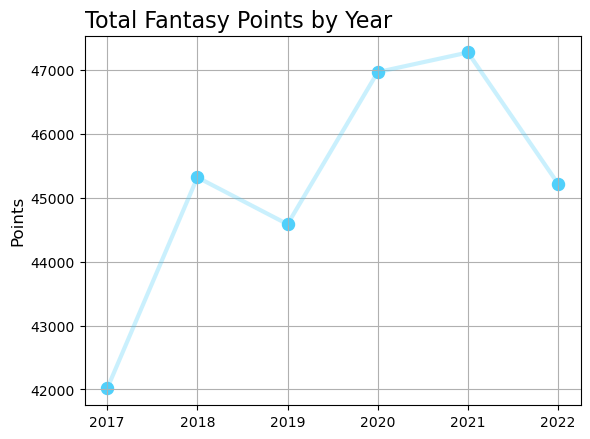

In [221]:
Figure1, Axes1 = plt.subplots()

Axes1.scatter(TotalFantasyPointDF["Year"],
                      TotalFantasyPointDF["Total Fantasy Points"],
                      color = blue_1,
                      s = 75)
Axes1.plot(TotalFantasyPointDF["Year"],
         TotalFantasyPointDF["Total Fantasy Points"],
         linewidth = 3,
         color = blue_1,
         alpha = .3)

plt.title(label = "Total Fantasy Points by Year",
          loc = "left",
          fontsize = 16)
plt.ylabel(ylabel = "Points",
           fontsize = 12)

plt.grid()

plt.savefig("./Resources/total_fantasy_points.png")

plt.show()


### 2.2.) What is the relationship between fantasy points and age of the players.

 - In order to analyze the average fantasy points and the age of the players we may need to remove outliers (e.g. Tom Brady) 

#### 2.2.a.) Average fantasy points and age

In [639]:
MainDF.head()

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,Rec,RecYds,YR,RecTD,Fmb,FL,PPR,PlayerID,PosRk,Year
0,1,Todd Gurley,LAR,RB,23,15,15,0,0,0,...,64,788,12.31,6,5,2,383.3,GurlTo01,1.0,2017
1,2,Russell Wilson,SEA,QB,29,16,16,339,553,3983,...,0,0,0.00,0,14,3,347.9,WilsRu00,1.0,2017
2,3,Le'Veon Bell,PIT,RB,25,15,15,0,0,0,...,85,655,7.71,2,3,2,341.6,BellLe00,2.0,2017
3,4,Alvin Kamara,NOR,RB,22,16,3,0,0,0,...,81,826,10.20,5,1,1,320.4,KamaAl00,3.0,2017
4,5,Antonio Brown,PIT,WR,29,14,14,0,0,0,...,101,1533,15.18,9,4,0,310.3,BrowAn04,1.0,2017


In [34]:
AverageFantasyPointsSeries = MainDF.groupby(by = "Age").mean()["PPR"]

AverageFantasyPoints2017 = MainDF2017.groupby(by = "Age").mean()["PPR"]
AverageFantasyPoints2018 = MainDF2018.groupby(by = "Age").mean()["PPR"]
AverageFantasyPoints2019 = MainDF2019.groupby(by = "Age").mean()["PPR"]
AverageFantasyPoints2020 = MainDF2020.groupby(by = "Age").mean()["PPR"]
AverageFantasyPoints2021 = MainDF2021.groupby(by = "Age").mean()["PPR"]
AverageFantasyPoints2022 = MainDF2022.groupby(by = "Age").mean()["PPR"]

/var/folders/1q/ddhwspk11717m09gwl9c0zdw0000gn/T/ipykernel_23923/1743763082.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  AverageFantasyPointsSeries = MainDF.groupby(by = "Age").mean()["PPR"]
/var/folders/1q/ddhwspk11717m09gwl9c0zdw0000gn/T/ipykernel_23923/1743763082.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  AverageFantasyPoints2017 = MainDF2017.groupby(by = "Age").mean()["PPR"]
/var/folders/1q/ddhwspk11717m09gwl9c0zdw0000gn/T/ipykernel_23923/1743763082.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will defaul

Text(0, 0.5, 'Fantasy Points')

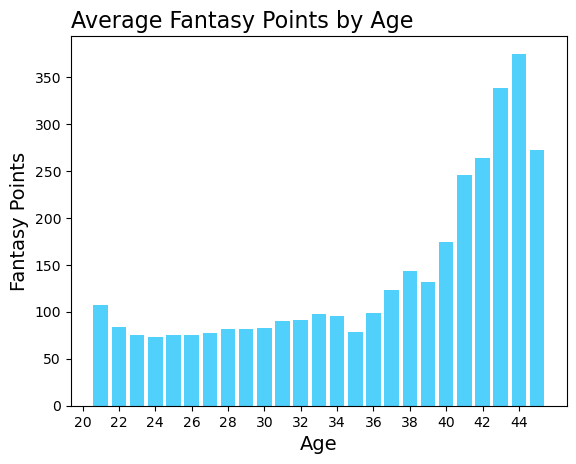

In [19]:
plt.bar(x = AverageFantasyPointsSeries.index,
        height = list(AverageFantasyPointsSeries),
        color = blue_1)
plt.title(label = "Average Fantasy Points by Age",
          loc = "left",
          fontsize = 16)

plt.xticks(np.arange(min(MainDF["Age"]) - 1, max(MainDF["Age"])  + 1 ,2))

plt.xlabel(xlabel = "Age",
           fontsize = 14)
plt.ylabel(ylabel = "Fantasy Points",
           fontsize = 14)

#### 2.2.b.) Average fantasy points and age at each year

This portion looks at the average fantasy points and age at each indivdidual year of 2017-2018.

Text(0, 0.5, 'Fantasy Points')

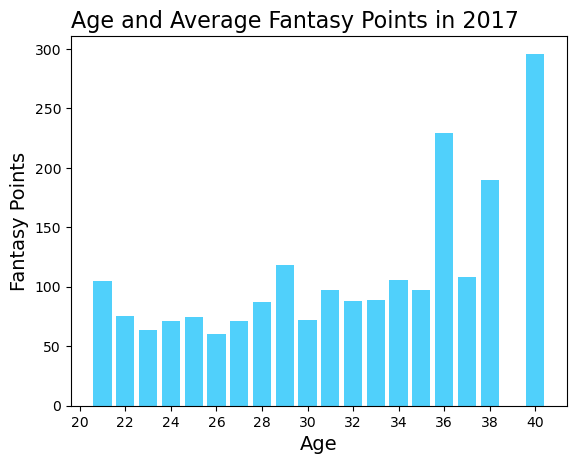

In [641]:
plt.bar(x = AverageFantasyPoints2017.index,
        height = list(AverageFantasyPoints2017),
        color = blue_1)
plt.title(label = "Age and Average Fantasy Points in 2017",
          loc = "left",
          fontsize = 16)
plt.xticks(np.arange(min(MainDF2017["Age"]) - 1, max(MainDF2017["Age"])  + 1 ,2))

plt.xlabel(xlabel = "Age",
           fontsize = 14)
plt.ylabel(ylabel = "Fantasy Points",
           fontsize = 14)

Text(0, 0.5, 'Fantasy Points')

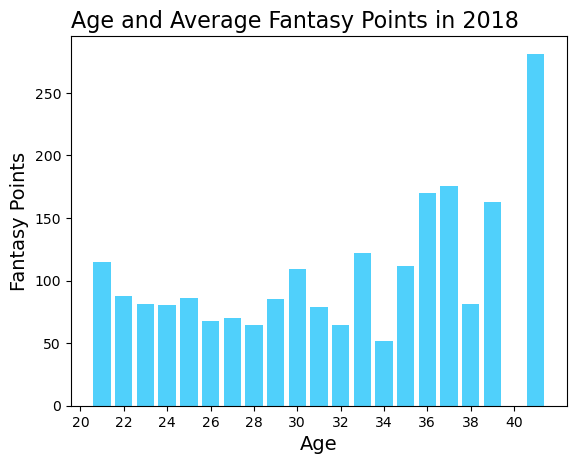

In [100]:
plt.bar(x = AverageFantasyPoints2018.index,
        height = list(AverageFantasyPoints2018),
        color = blue_1)
plt.title(label = "Age and Average Fantasy Points in 2018",
          loc = "left",
          fontsize = 16)
plt.xticks(np.arange(min(MainDF2018["Age"]) - 1, max(MainDF2018["Age"])  + 1 ,2))

plt.xlabel(xlabel = "Age",
           fontsize = 14)
plt.ylabel(ylabel = "Fantasy Points",
           fontsize = 14)

Text(0, 0.5, 'Fantasy Points')

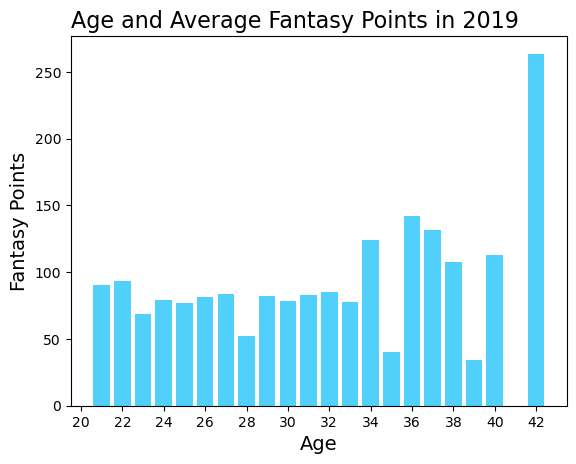

In [101]:
plt.bar(x = AverageFantasyPoints2019.index,
        height = list(AverageFantasyPoints2019),
        color = blue_1)
plt.title(label = "Age and Average Fantasy Points in 2019",
          loc = "left",
          fontsize = 16)
plt.xticks(np.arange(min(MainDF2019["Age"]) - 1, max(MainDF2019["Age"])  + 1 ,2))

plt.xlabel(xlabel = "Age",
           fontsize = 14)
plt.ylabel(ylabel = "Fantasy Points",
           fontsize = 14)

Plot of Figure2

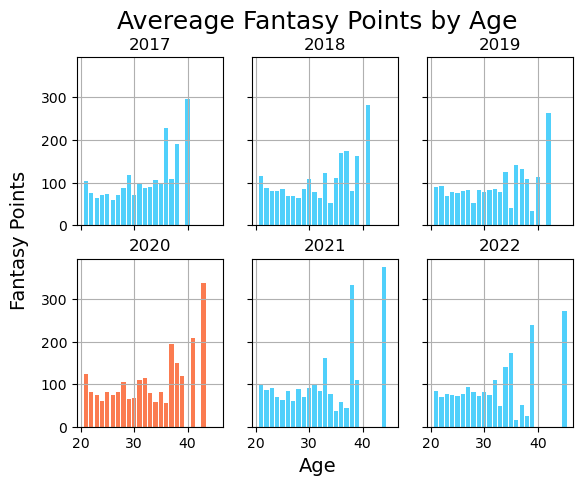

In [222]:
Figure2, Axes2 = plt.subplots(2,3, sharex = True, sharey = True)

# 2017
Axes2[0,0].bar(x = AverageFantasyPoints2017.index,
               height = list(AverageFantasyPoints2017),
               color = blue_1)
Axes2[0,0].set_title(label = "2017")
Axes2[0,0].grid()

# 2018
Axes2[0,1].bar(x = AverageFantasyPoints2018.index,
               height = list(AverageFantasyPoints2018),
               color = blue_1)
Axes2[0,1].set_title(label = "2018")
Axes2[0,1].grid()

# 2019
Axes2[0,2].bar(x = AverageFantasyPoints2019.index,
               height = list(AverageFantasyPoints2019),
               color = blue_1)
Axes2[0,2].set_title(label = "2019")
Axes2[0,2].grid()

# 2020
Axes2[1,0].bar(x = AverageFantasyPoints2020.index,
               height = list(AverageFantasyPoints2020),
               color = orange_1)
Axes2[1,0].set_title(label = "2020")
Axes2[1,0].grid()

# 2021
Axes2[1,1].bar(x = AverageFantasyPoints2021.index,
               height = list(AverageFantasyPoints2021),
               color = blue_1)
Axes2[1,1].set_title(label = "2021")
Axes2[1,1].grid()

# 2022
Axes2[1,2].bar(x = AverageFantasyPoints2022.index,
               height = list(AverageFantasyPoints2022),
               color = blue_1)
Axes2[1,2].set_title(label = "2022")
Axes2[1,2].grid()

Figure2.suptitle(t = "Avereage Fantasy Points by Age",
                 fontsize = 18)
Figure2.supxlabel(t = "Age",
                  fontsize = 14)
Figure2.supylabel(t = "Fantasy Points",
                  fontsize = 14)

plt.savefig("./Resources/average_fantasy_points_by_age.png")

plt.show()



#### 2.2.c.) Average fantasy points by age and each position

In [64]:
MainDF.head()

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,Rec,RecYds,YR,RecTD,Fmb,FL,PPR,PlayerID,PosRk,Year
0,1,Todd Gurley,LAR,RB,23,15,15,0,0,0,...,64,788,12.31,6,5,2,383.3,GurlTo01,1.0,2017
1,2,Russell Wilson,SEA,QB,29,16,16,339,553,3983,...,0,0,0.00,0,14,3,347.9,WilsRu00,1.0,2017
2,3,Le'Veon Bell,PIT,RB,25,15,15,0,0,0,...,85,655,7.71,2,3,2,341.6,BellLe00,2.0,2017
3,4,Alvin Kamara,NOR,RB,22,16,3,0,0,0,...,81,826,10.20,5,1,1,320.4,KamaAl00,3.0,2017
4,5,Antonio Brown,PIT,WR,29,14,14,0,0,0,...,101,1533,15.18,9,4,0,310.3,BrowAn04,1.0,2017


In [85]:
# Removed Tom Brady

QB_DF = CleanedMainDF[CleanedMainDF["FantPos"] == "QB"]
RB_DF = MainDF[MainDF["FantPos"] == "RB"]
WR_DF = MainDF[MainDF["FantPos"] == "WR"]
TE_DF = MainDF[MainDF["FantPos"] == "TE"]

In [55]:
QB_AverageFantasyPoints = QB_DF.groupby(by = "Age").mean()["PPR"]
RB_AverageFantasyPoints = RB_DF.groupby(by = "Age").mean()["PPR"]
WR_AverageFantasyPoints = WR_DF.groupby(by = "Age").mean()["PPR"]
TE_AverageFantasyPoints = TE_DF.groupby(by = "Age").mean()["PPR"]

/var/folders/1q/ddhwspk11717m09gwl9c0zdw0000gn/T/ipykernel_23923/639451446.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  QB_AverageFantasyPoints = QB_DF.groupby(by = "Age").mean()["PPR"]
/var/folders/1q/ddhwspk11717m09gwl9c0zdw0000gn/T/ipykernel_23923/639451446.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  RB_AverageFantasyPoints = RB_DF.groupby(by = "Age").mean()["PPR"]
/var/folders/1q/ddhwspk11717m09gwl9c0zdw0000gn/T/ipykernel_23923/639451446.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. E

Text(0, 0.5, 'Fantasy Points')

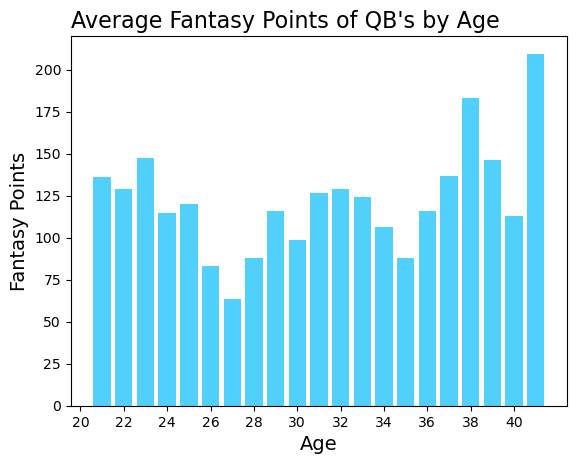

In [57]:
plt.bar(x = QB_AverageFantasyPoints.index,
        height = list(QB_AverageFantasyPoints),
        color = blue_1)
plt.title(label = "Average Fantasy Points of QB's by Age",
          loc = "left",
          fontsize = 16)
plt.xticks(np.arange(min(QB_DF["Age"]) - 1, max(QB_DF["Age"])  + 1 ,2))

plt.xlabel(xlabel = "Age",
           fontsize = 14)
plt.ylabel(ylabel = "Fantasy Points",
           fontsize = 14)

Text(0, 0.5, 'Fantasy Points')

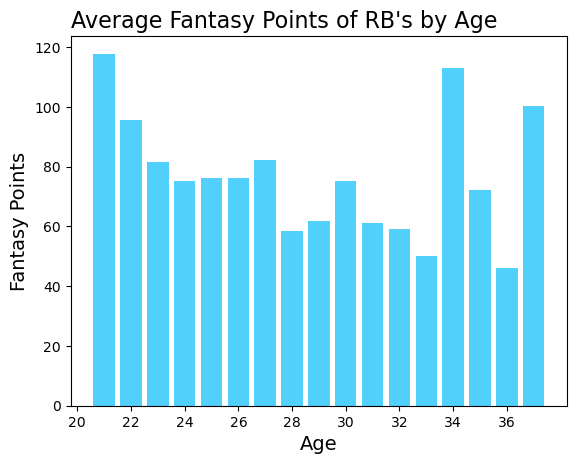

In [58]:
plt.bar(x = RB_AverageFantasyPoints.index,
        height = list(RB_AverageFantasyPoints),
        color = blue_1)
plt.title(label = "Average Fantasy Points of RB's by Age",
          loc = "left",
          fontsize = 16)
plt.xticks(np.arange(min(RB_DF["Age"]) - 1, max(RB_DF["Age"])  + 1 ,2))

plt.xlabel(xlabel = "Age",
           fontsize = 14)
plt.ylabel(ylabel = "Fantasy Points",
           fontsize = 14)

Plot of Figure3

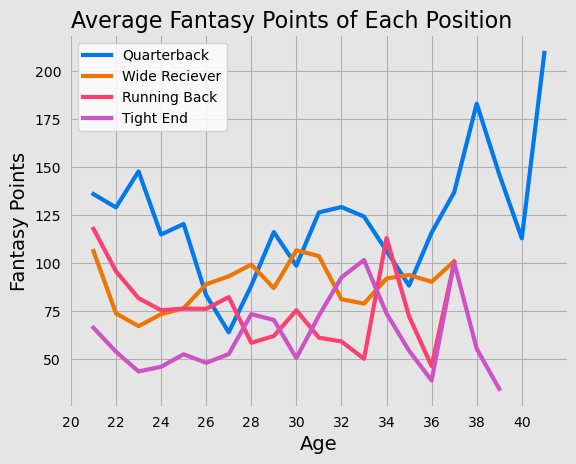

In [224]:
Figure3, Axes3 = plt.subplots()


Figure3.patch.set_facecolor(light_gray_1)
Axes3.set_facecolor(light_gray_1)

Axes3.plot(QB_AverageFantasyPoints.index,
        list(QB_AverageFantasyPoints),
        color = blue_2,
        linewidth = 3)
Axes3.plot(WR_AverageFantasyPoints.index,
        list(WR_AverageFantasyPoints),
        color = orange_2,
        linewidth = 3)
Axes3.plot(RB_AverageFantasyPoints.index,
        list(RB_AverageFantasyPoints),
        color = red_2,
        linewidth = 3)
Axes3.plot(TE_AverageFantasyPoints.index,
        list(TE_AverageFantasyPoints),
        color = pink_2,
        linewidth = 3)

Axes3.spines["top"].set_visible(False)
Axes3.spines["right"].set_visible(False)
Axes3.spines["bottom"].set_visible(False)
Axes3.spines["left"].set_visible(False)

plt.title(label = "Average Fantasy Points of Each Position",
          loc = "left",
          fontsize = 16)
plt.xticks(np.arange(min(CleanedMainDF["Age"]) - 1, max(CleanedMainDF["Age"])  + 1 ,2))
plt.tick_params(left = False)
plt.tick_params(bottom = False)

plt.xlabel(xlabel = "Age",
           fontsize = 14)
plt.ylabel(ylabel = "Fantasy Points",
           fontsize = 14)

plt.legend(["Quarterback", "Wide Reciever","Running Back","Tight End"], 
           loc = "best")


plt.grid()

plt.savefig("./Resources/average_fantasy_points_by_position.png")

plt.show()

### 2.3.) The fantasy points of all the players over 2017-2022.

### 2.4.) Total Fantasy Points by Team

Super Bowl Winners

- **2017 PHI** (Philadalphia Eagles)
- **2018 NWE** (New England Patriots)
- **2019 KAN** (Kansas City Chiefs)
- **2020 TAM** (Tampa Bay Buccaneers)
- **2021 LAR** (Los Angeles Rams)
- **2022 KAN** (Kansas City Chiefs)

In [140]:
# Create TeamDF from MainDF
TeamDF = MainDF[(MainDF["Tm"] != "2TM") &
                (MainDF["Tm"] != "3TM")
                ]

CleanedTeamDF = TeamDF[(TeamDF["Tm"] != "LVR") &
                       (TeamDF["Tm"] != "OAK")]

# Create a series grouped by team and year
TeamFantasyPointsSeries = TeamDF.groupby(by = ["Tm","Year"]).sum()["PPR"]
CleanedTeamFantasyPointsSeries = CleanedTeamDF.groupby(by = ["Tm","Year"]).sum()["PPR"]

# Create a list of all the unique teams
all_teams = TeamDF["Tm"].unique()
cleaned_all_teams = CleanedTeamDF["Tm"].unique()

# List containing all the years
all_years = [2017,2018,2019,2020,2021,2022]


/var/folders/1q/ddhwspk11717m09gwl9c0zdw0000gn/T/ipykernel_23923/103201507.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  TeamFantasyPointsSeries = TeamDF.groupby(by = ["Tm","Year"]).sum()["PPR"]
/var/folders/1q/ddhwspk11717m09gwl9c0zdw0000gn/T/ipykernel_23923/103201507.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  CleanedTeamFantasyPointsSeries = CleanedTeamDF.groupby(by = ["Tm","Year"]).sum()["PPR"]


In [156]:
# Code to compute the average of the total fantasy points of all teams
average_total_points = []

for year in all_years:
    total = 0
    for team in cleaned_all_teams:
        total_for_each_team = CleanedTeamFantasyPointsSeries[team,year]
        total = total + total_for_each_team
    average = total/len(cleaned_all_teams)
    average_total_points.append(average)

TotalAverageFantasyPointsDF = pd.DataFrame({
    "Year": all_years,
    "Average Total Fantasy Points": average_total_points
})

TotalAverageFantasyPointsDF

,Year,Average Total Fantasy Points
0,2017,1282.064516
1,2018,1378.238710
2,2019,1363.845161
3,2020,1452.480645
4,2021,1443.154839
5,2022,1348.254839


Plot of Figure4

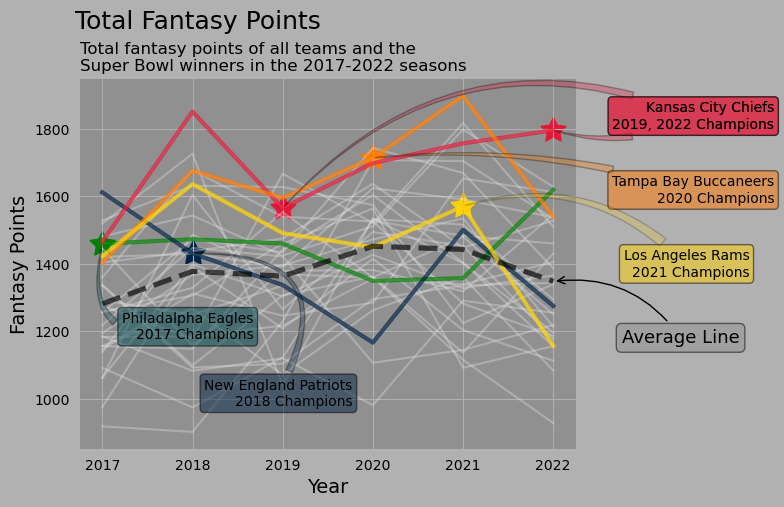

In [268]:
# Size of the Super Bowl Winner points
size_of_stars = 350

Figure4, Axes4 = plt.subplots()

Figure4.patch.set_facecolor(gray_2)
Axes4.set_facecolor(gray_1)

# Plot lines for all teams
for team in all_teams:
    
    # An array for the x-axis that contains the years (Not all teams are in all of 2017-2022)

    years = TeamFantasyPointsSeries[team].index

    # An array for the y-axis that contains points

    points_by_team = []

    for year in years:
        
        # Get the total fantasy points of each team at a specific year
        total_points = TeamFantasyPointsSeries[team, year]

        points_by_team.append(total_points)

    # Plot each team's total fantasy points
    plt.plot(years,
             points_by_team,
             color = light_gray_1,
             alpha = .35)
    
# Plot the lines of Super Bowl Winners
plt.plot(TeamFantasyPointsSeries["PHI"].index,
         list(TeamFantasyPointsSeries["PHI"]),
         color = "green",
         linewidth = 3,
         alpha = .7)

plt.plot(TeamFantasyPointsSeries["NWE"].index,
         list(TeamFantasyPointsSeries["NWE"]),
         color = blue_3,
         linewidth = 3,
         alpha = .7)

plt.plot(TeamFantasyPointsSeries["KAN"].index,
         list(TeamFantasyPointsSeries["KAN"]),
         color = red_3,
         linewidth = 3,
         alpha = .7)

plt.plot(TeamFantasyPointsSeries["TAM"].index,
         list(TeamFantasyPointsSeries["TAM"]),
         color = orange_3,
         linewidth = 3,
         alpha = .7)

plt.plot(TeamFantasyPointsSeries["LAR"].index,
         list(TeamFantasyPointsSeries["LAR"]),
         color = yellow_3,
         linewidth = 3,
         alpha = .7)


# Plot the points of Super Bowl Winners
plt.scatter(x = 2017,
            y = TeamFantasyPointsSeries["PHI", 2017],
            color = "green",
            s = size_of_stars,
            marker = (5,1))

plt.scatter(x = 2018,
            y = TeamFantasyPointsSeries["NWE", 2018],
            color = blue_3,
            s = size_of_stars,
            marker = (5,1))

plt.scatter(x = 2019,
            y = TeamFantasyPointsSeries["KAN", 2019],
            color = red_3,
            s = size_of_stars,
            marker = (5,1))

plt.scatter(x = 2020,
            y = TeamFantasyPointsSeries["TAM", 2020],
            color = orange_3,
            s = size_of_stars,
            marker = (5,1))

plt.scatter(x = 2021,
            y = TeamFantasyPointsSeries["LAR", 2021],
            color = yellow_3,
            s = size_of_stars,
            marker = (5,1))

plt.scatter(x = 2022,
            y = TeamFantasyPointsSeries["KAN", 2022],
            color = red_3,
            s = size_of_stars,
            marker = (5,1))

# Graph the average line
plt.plot(TotalAverageFantasyPointsDF["Year"],
         TotalAverageFantasyPointsDF["Average Total Fantasy Points"],
         color = "black",
         linestyle = "dashed",
         linewidth = 3.7,
         alpha = .65)

# Annotation of Philadalphia Eagles
Axes4.annotate(text = "Philadalpha Eagles\n2017 Champions",
               xy = (2017,TeamFantasyPointsSeries["PHI",2017]),
               xycoords = "data",
               xytext = (.35,.33),
               textcoords = "axes fraction",
               size = 10,
               ha = "right",
               va = "center",
               bbox = dict(boxstyle = "round",
                           alpha = 0.5,
                           facecolor = green_3),
               arrowprops = dict(arrowstyle = "wedge, tail_width = .5",
                                 alpha = 0.3,
                                 connectionstyle= "arc3, rad = -0.8",
                                 facecolor = green_3))

# Annotation for New England Patriots
Axes4.annotate(text = "New England Patriots\n2018 Champions",
               xy = (2018,TeamFantasyPointsSeries["NWE",2018]),
               xycoords = "data",
               xytext = (.55,.15),
               textcoords = "axes fraction",
               size = 10,
               ha = "right",
               va = "center",
               bbox = dict(boxstyle = "round",
                           alpha = 0.5,
                           facecolor = blue_3),
               arrowprops = dict(arrowstyle = "wedge, tail_width = .5",
                                 alpha = 0.3,
                                 connectionstyle = "arc3, rad = 0.85",
                                 facecolor = blue_3))

# Annotation for Kansas City Chiefs
Axes4.annotate(text = "Kansas City Chiefs\n2019, 2022 Champions",
               xy = (2022,TeamFantasyPointsSeries["KAN",2022]),
               xycoords = "data",
               xytext = (1.4,.9),
               textcoords = "axes fraction",
               size = 10,
               ha = "right",
               va = "center",
               bbox = dict(boxstyle = "round",
                           alpha = 0.5,
                           facecolor = red_3),
               arrowprops = dict(arrowstyle = "wedge, tail_width=.5",
                                 alpha = 0.3,
                                 connectionstyle= "arc3, rad = -0.2",
                                 facecolor = red_3))

Axes4.annotate(text = "Kansas City Chiefs\n2019, 2022 Champions",
               xy = (2019,TeamFantasyPointsSeries["KAN",2019]),
               xycoords = "data",
               xytext = (1.4,.9),
               textcoords = "axes fraction",
               size = 10,
               ha = "right",
               va = "center",
               bbox = dict(boxstyle = "round",
                           alpha = 0.5,
                           facecolor = red_3),
               arrowprops = dict(arrowstyle = "wedge, tail_width = .5",
                                 alpha = 0.3,
                                 connectionstyle = "arc3, rad = 0.35",
                                 facecolor = red_3))

# Annotation for Tampa Bay Buccaneers
Axes4.annotate(text = "Tampa Bay Buccaneers\n2020 Champions",
               xy = (2020,TeamFantasyPointsSeries["TAM",2020]),
               xycoords = "data",
               xytext = (1.4,.7),
               textcoords = "axes fraction",
               size = 10,
               ha = "right",
               va = "center",
               bbox = dict(boxstyle = "round",
                           alpha = 0.5,
                           facecolor = orange_3),
               arrowprops = dict(arrowstyle = "wedge, tail_width = .5",
                                 alpha = 0.3,
                                 connectionstyle = "arc3, rad = 0.1",
                                 facecolor = orange_3))

# Annotation for Los Angeles Rams
Axes4.annotate(text = "Los Angeles Rams\n2021 Champions",
               xy = (2021,TeamFantasyPointsSeries["LAR",2021]),
               xycoords = "data",
               xytext = (1.35,.5),
               textcoords = "axes fraction",
               size = 10,
               ha = "right",
               va = "center",
               bbox = dict(boxstyle = "round",
                           alpha = 0.5,
                           facecolor = yellow_3),
               arrowprops = dict(arrowstyle = "wedge, tail_width = .7",
                               #  fc = ",6",
                                 alpha = 0.2,
                                 connectionstyle = "arc3, rad = 0.3",
                                 facecolor = yellow_3))

# Annotation for Average Line
Axes4.annotate(text = "Average Line",
               xy = (2022,TotalAverageFantasyPointsDF["Average Total Fantasy Points"].iloc[-1]),
               xycoords = "data",
               xytext = (1.33,.3),
               textcoords = "axes fraction",
               size = 13,
               ha = "right",
               va = "center",
               bbox = dict(boxstyle = "round",
                           alpha = 0.5,
                           facecolor = gray_1),
               arrowprops = dict(arrowstyle = "->",
                                 connectionstyle = "arc3, rad = 0.3",
                                 facecolor = "black"))

# Theme for plot
Axes4.spines["top"].set_visible(False)
Axes4.spines["right"].set_visible(False)
Axes4.spines["bottom"].set_visible(False)
Axes4.spines["left"].set_visible(False)

plt.suptitle(t = "Total Fantasy Points",
             x = .31,
             y = 1.025,
             fontsize = 18)
plt.title(label = "Total fantasy points of all teams and the \nSuper Bowl winners in the 2017-2022 seasons",
          loc = "left",
          fontsize = 12)
plt.xlabel(xlabel = "Year",
           fontsize = 14)
plt.ylabel(ylabel = "Fantasy Points",
           fontsize = 14)
plt.tick_params(left = False)
plt.tick_params(bottom = False)
plt.grid()

plt.show()



## 3. Brainstorming

### 3.1.) Histogram Of Data

(array([56., 60., 85., 82., 78., 61., 99., 13., 15., 14.,  9.,  5.,  6.,
         7.,  1.,  2.,  0.,  0.,  0.,  1.]),
 array([21.  , 22.15, 23.3 , 24.45, 25.6 , 26.75, 27.9 , 29.05, 30.2 ,
        31.35, 32.5 , 33.65, 34.8 , 35.95, 37.1 , 38.25, 39.4 , 40.55,
        41.7 , 42.85, 44.  ]),
 <BarContainer object of 20 artists>)

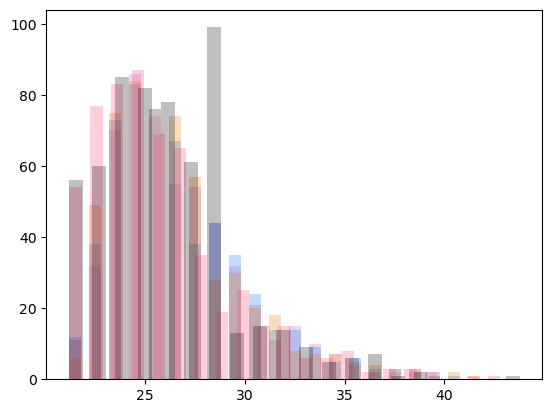

In [53]:
plt.hist(MainDF2017["Age"],
         bins = len(MainDF2017["Age"].unique()),
         color = pink_2,
         alpha = .25,
         rwidth = .6)
plt.hist(MainDF2018["Age"],
         bins = len(MainDF2018["Age"].unique()),
         color = blue_2,
         alpha = .25,
         rwidth=.6)
plt.hist(MainDF2019["Age"],
         bins = len(MainDF2019["Age"].unique()),
         color = orange_2,
         alpha = .25,
         rwidth=.6)
plt.hist(MainDF2020["Age"],
         bins = len(MainDF2020["Age"].unique()),
         color = red_2,
         alpha = .25,
         rwidth=.6)
plt.hist(MainDF2021["Age"],
         bins = len(MainDF2021["Age"].unique()),
         color = "black",
         alpha = .25,
         rwidth=.6)

In [ ]:
# Create Summary Table for age and points


In [59]:
quartiles = MainDF["Age"].quantile([.25,.5,.75])
quartiles

0.25    24.0
0.50    25.0
0.75    28.0
Name: Age, dtype: float64

In [61]:
quartiles[.25]

24.0

In [64]:
NewMainDF = MainDF[(MainDF["Age"] >= quartiles[.25]) & 
                   (MainDF["Age"] <= quartiles[.75])]
NewMainDF

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,Rec,RecYds,YR,RecTD,Fmb,FL,PPR,PlayerID,PosRk,Year
2,3,Le'Veon Bell,PIT,RB,25,15,15,0,0,0,...,85,655,7.71,2,3,2,341.6,BellLe00,2.0,2017
5,6,DeAndre Hopkins,HOU,WR,25,15,15,0,0,0,...,96,1378,14.35,13,1,1,309.8,HopkDe00,2.0,2017
6,7,Cam Newton,CAR,QB,28,16,16,291,492,3302,...,0,0,0.00,0,9,1,299.5,NewtCa00,2.0,2017
10,11,Melvin Gordon,LAC,RB,24,16,16,0,0,0,...,58,476,8.21,4,1,0,288.1,GordMe00,5.0,2017
11,12,Keenan Allen,LAC,WR,25,16,15,0,0,0,...,102,1393,13.66,6,1,0,284.2,AlleKe00,3.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3374,564,Kylin Hill,GNB,RB,24,2,0,0,0,0,...,0,0,0.00,0,0,0,0.7,HillKy00,158.0,2022
3377,567,Jacob Eason,CAR,QB,25,1,0,3,5,59,...,0,0,0.00,0,0,0,0.4,EasoJa00,78.0,2022
3382,572,Jordan Howard,NOR,RB,28,2,0,0,0,0,...,0,0,0.00,0,0,0,0.1,HowaJo00,162.0,2022
3384,574,KaVontae Turpin,DAL,WR,26,17,0,0,0,0,...,1,9,9.00,0,3,2,-0.4,TurpKa00,218.0,2022


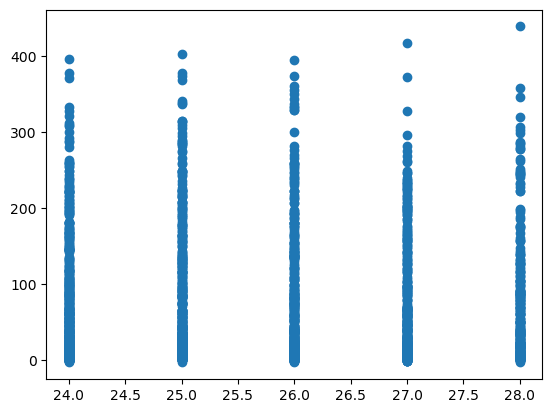

In [65]:
plt.scatter(x = NewMainDF["Age"],
            y = NewMainDF["PPR"])

In [53]:
MainDF2017["Age"].quantile([.25,.5,.75])

0.25    24.0
0.50    25.0
0.75    28.0
Name: Age, dtype: float64

In [46]:
print(f"Min age is {MainDF2017['Age'].min()}")
print(f"Max age is {MainDF2017['Age'].max()}")
print(f"Ave age is {MainDF2017['Age'].mean()}")
print(f"Median age is {MainDF2017['Age'].median()}")

Min age is 21
Max age is 40
Ave age is 26.170093457943924
Median age is 25.0


In [49]:
print(f"Min age is {MainDF2019['Age'].min()}")
print(f"Max age is {MainDF2019['Age'].max()}")
print(f"Ave age is {MainDF2019['Age'].mean()}")
print(f"Median age is {MainDF2019['Age'].median()}")

Min age is 21
Max age is 42
Ave age is 26.059245960502693
Median age is 25.0


In [50]:
print(f"Min age is {MainDF2018['Age'].min()}")
print(f"Max age is {MainDF2018['Age'].max()}")
print(f"Ave age is {MainDF2018['Age'].mean()}")
print(f"Median age is {MainDF2018['Age'].median()}")

Min age is 21
Max age is 41
Ave age is 26.169398907103826
Median age is 25.0


In [41]:
print(f"Min age is {MainDF['Age'].min()}")
print(f"Max age is {MainDF['Age'].max()}")
print(f"Ave age is {MainDF['Age'].mean()}")
print(f"Median age is {MainDF['Age'].median()}")

#MainDF["Age"].median()
#MainDF["Age"].mean()

Min age is 21
Max age is 45
Ave age is 26.151711924439198
Median age is 25.0


In [32]:
MainDF["Age"].mean()

26.151711924439198

In [29]:
linregress(MainDF["Age"],MainDF["PPR"])

LinregressResult(slope=1.9993011156380098, intercept=27.82040217008295, rvalue=0.07854472037136719, pvalue=4.712388628803248e-06, stderr=0.43608780654984935, intercept_stderr=11.499096234433024)

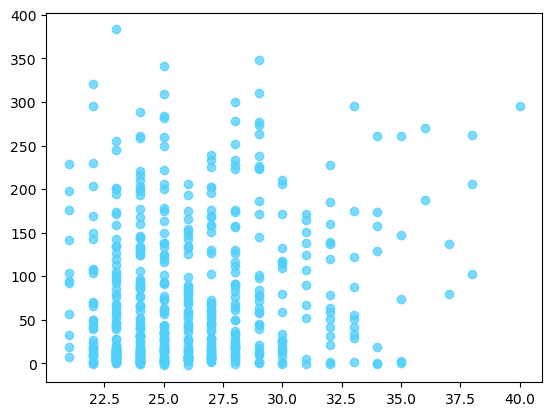

In [56]:
plt.scatter(x = MainDF2017["Age"],
            y = MainDF2017["PPR"],
            alpha = .75,
            color = blue)

In [77]:
AgeSeries2017 = MainDF2017.groupby(by = "Age").sum()["PPR"]
AgeSeries2017

/var/folders/1q/ddhwspk11717m09gwl9c0zdw0000gn/T/ipykernel_8031/3995466944.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  AgeSeries2017 = MainDF2017.groupby(by = "Age").sum()["PPR"]


Age
21    1149.5
22    2422.5
23    4456.0
24    6155.2
25    5522.8
26    3311.7
27    3825.5
28    3833.8
29    3788.0
30    1504.5
31    1072.2
32    1316.9
33     890.6
34     740.2
35     484.3
36     457.7
37     216.8
38     570.3
40     295.9
Name: PPR, dtype: float64

In [79]:
AgeSeries2017.index

Int64Index([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
            38, 40],
           dtype='int64', name='Age')

In [81]:
AgeSeries2017["Age"]

KeyError: 'Age'

In [92]:
min(MainDF2017["Age"])

21

In [98]:
list(range(0,10,2))

[0, 2, 4, 6, 8]

In [ ]:
# plt.xticks(np.arange(min(x), max(x)+1, 1.0))

In [109]:
np.arange(21,45,3)

array([21, 24, 27, 30, 33, 36, 39, 42])

Text(0, 0.5, 'Fantasy Points')

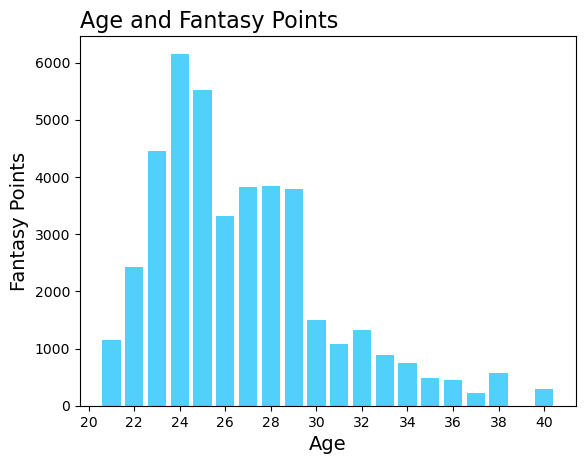

In [124]:
plt.bar(x = AgeSeries2017.index,
        height = list(AgeSeries2017),
        color = blue)
plt.title(label = "Age and Fantasy Points",
          loc = "left",
          fontsize = 16)
#plt.xlim(min(MainDF2017["Age"]) - 1, max(MainDF2017["Age"]) + 1)
plt.xticks(np.arange(min(MainDF2017["Age"]) - 1, max(MainDF2017["Age"])  + 1 ,2))

plt.xlabel(xlabel = "Age",
           fontsize = 14)
plt.ylabel(ylabel = "Fantasy Points",
           fontsize = 14)